<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/5_Leveraging_LeNet_CNN_for_Effective_Traffic_Sign_Classification_and_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Leveraging LeNet CNN for Effective Traffic Sign Classification and Recognition.</b></div>

# *1. Overview*

### In this case study, we will train a Deep Network to classify images of traffic signs. The dataset features 43 distinct classes of images, as listed below:

- **0:** Speed limit (20 km/h) | **1:** Speed limit (30 km/h) | **2:** Speed limit (50 km/h) | **3:** Speed limit (60 km/h) | **4:** Speed limit (70 km/h) | **5:** Speed limit (80 km/h) | **6:** End of speed limit (80 km/h) | **7:** Speed limit (100 km/h) | **8:** Speed limit (120 km/h) | **9:** No passing **10:** No passing for vehicles over 3.5 metric tons | **11:** Right-of-way at the next intersection | **12:** Priority road | **13:** Yield | **14:** Stop | **15:** No vehicles | **16:** Vehicles over 3.5 metric tons prohibited | **17:** No entry | **18:** General caution | **19:** Dangerous curve to the left**20:** Dangerous curve to the right | **21:** Double curve | **22:** Bumpy road | **23:** Slippery road | **24:** Road narrows on the right | **25:** Road work | **26:** Traffic signals | **27:** Pedestrians | **28:** Children crossing | **29:** Bicycles crossing **30:** Beware of ice/snow | **31:** Wild animals crossing | **32:** End of all speed and passing limits | **33:** Turn right ahead | **34:** Turn left ahead | **35:** Ahead only | **36:** Go straight or right | **37:** Go straight or left | **38:** Keep right | **39:** Keep left **40:** Roundabout mandatory | **41:** End of no passing | **42:** End of no passing by vehicles over 3.5 metric tons


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [ ]:

with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape


(34799,)

#

# *2. Data exploration and visualization*

1

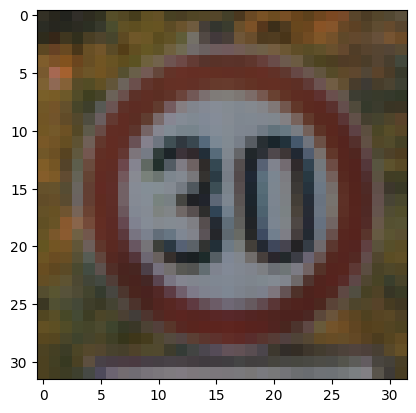

In [ ]:
i = 3888
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


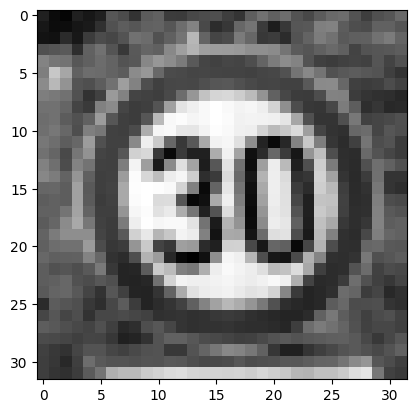

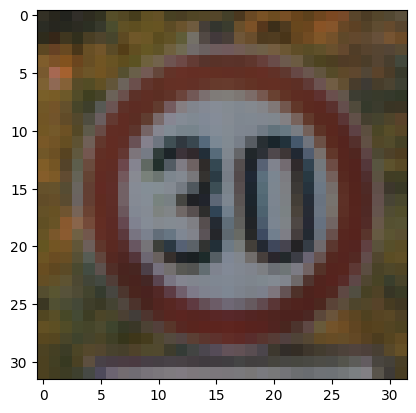

In [ ]:
i = 3888
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


#

# *3. Model Training*

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Dense, Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

2024-08-05 14:39:40.738566: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120,activation='relu'))
cnn_model.add(Dense(units=84,activation='relu'))
cnn_model.add(Dense(units=43,activation='softmax'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [ ]:

history=cnn_model.fit(
    X_train_gray_norm,                # Eğitim verileri
    y_train,                          # Eğitim etiketleri
    batch_size=500,                   # Her seferinde 500 örnekle eğitim yapılacak
    epochs=10,                 # you can increase the number       # Toplam 50 eğitim döngüsü (epoch) yapılacak
    verbose=1,                        # Eğitim sırasında detaylı bilgi gösterilecek
    validation_data=(X_validation_gray_norm, y_validation)  # Doğrulama verileri
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.0917 - loss: 3.4912 - val_accuracy: 0.2671 - val_loss: 2.8035
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.4253 - loss: 2.1265 - val_accuracy: 0.5145 - val_loss: 1.6270
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.6517 - loss: 1.2123 - val_accuracy: 0.6621 - val_loss: 1.1465
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.7655 - loss: 0.8270 - val_accuracy: 0.7143 - val_loss: 0.9576
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.8214 - loss: 0.6358 - val_accuracy: 0.7311 - val_loss: 0.8584
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.8490 - loss: 0.5391 - val_accuracy: 0.7676 - val_loss: 0.7601
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.8778 - loss: 0.4503 - val_accuracy: 0.7871 - val_loss: 0.7065
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.8967 - loss: 0.3952 - val_accuracy: 0

#

# *4. Model evaluation*

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7977


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

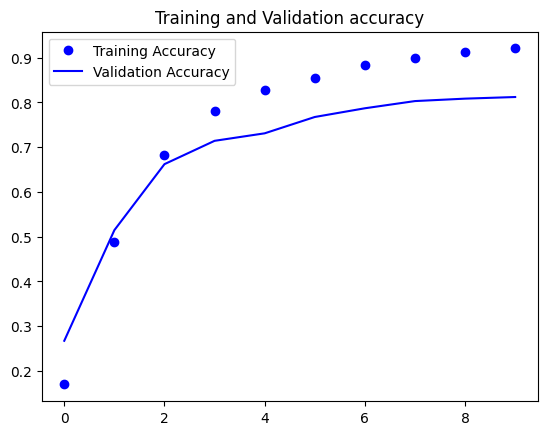

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

In [ ]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


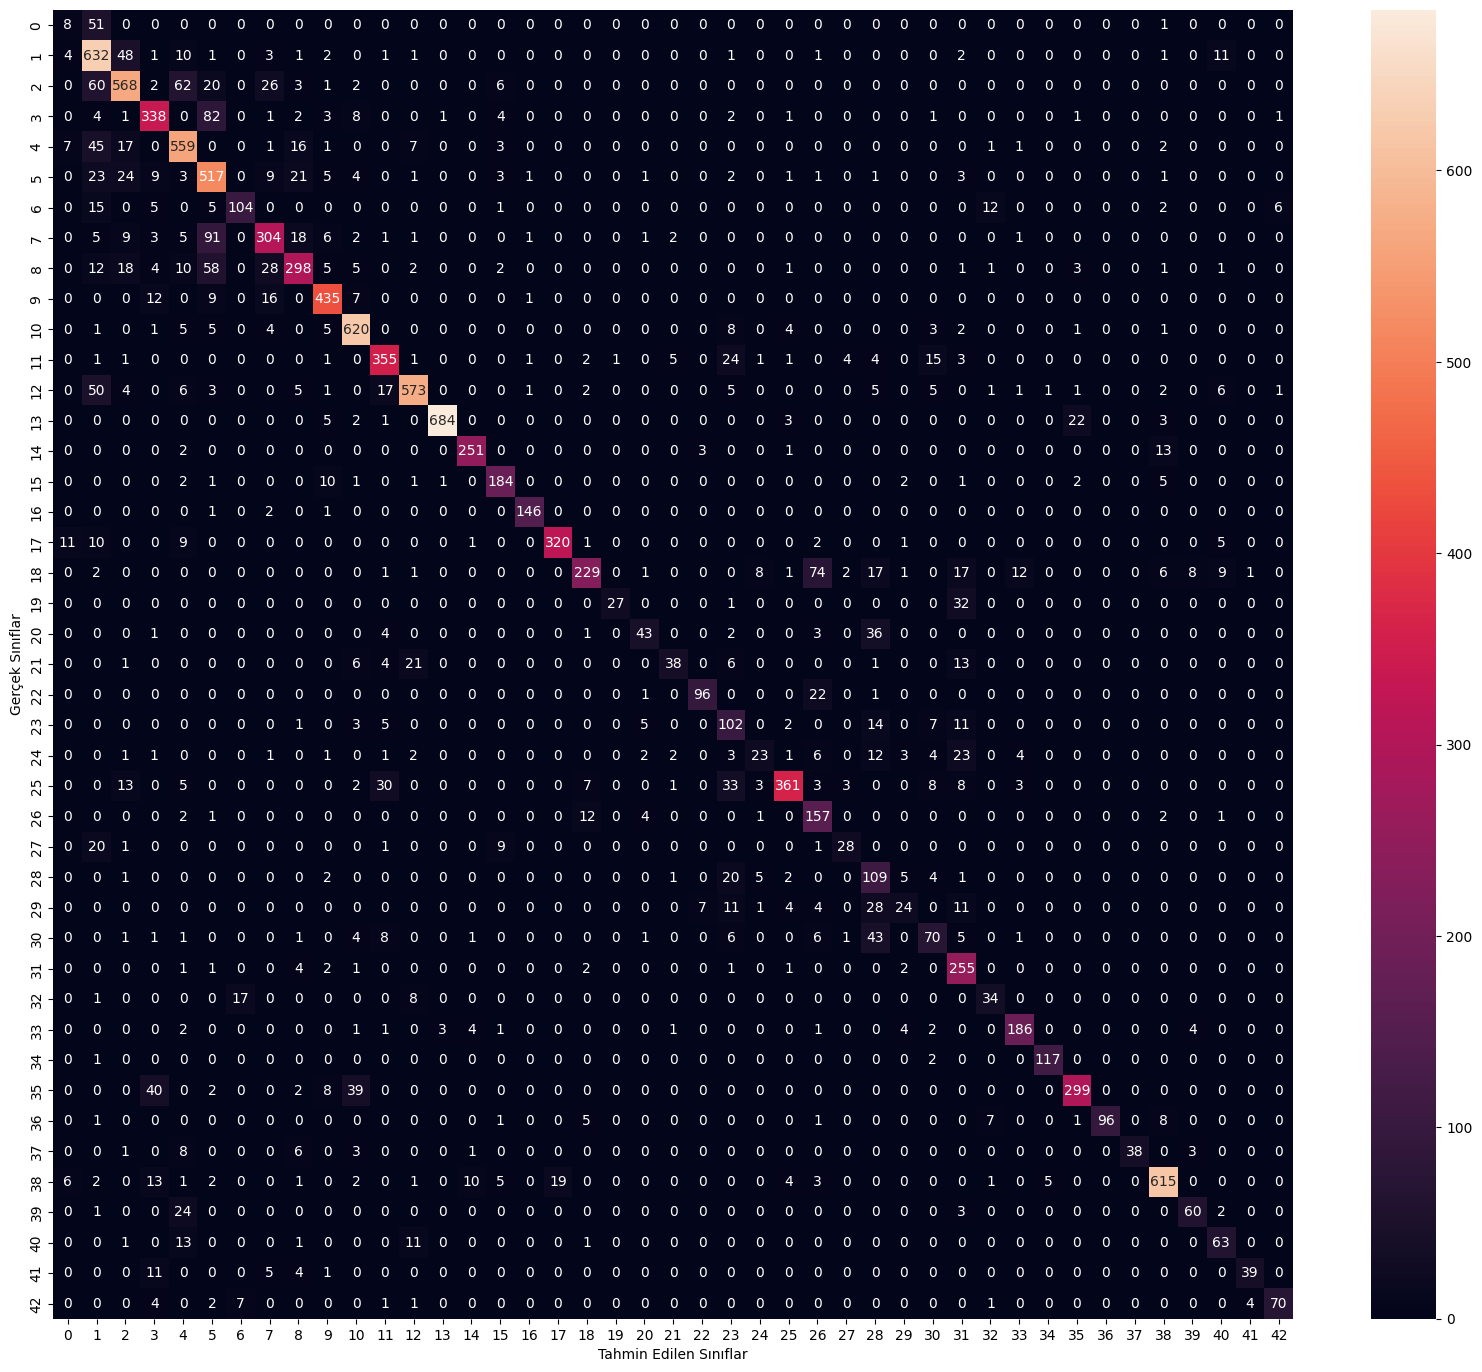

<Axes: >

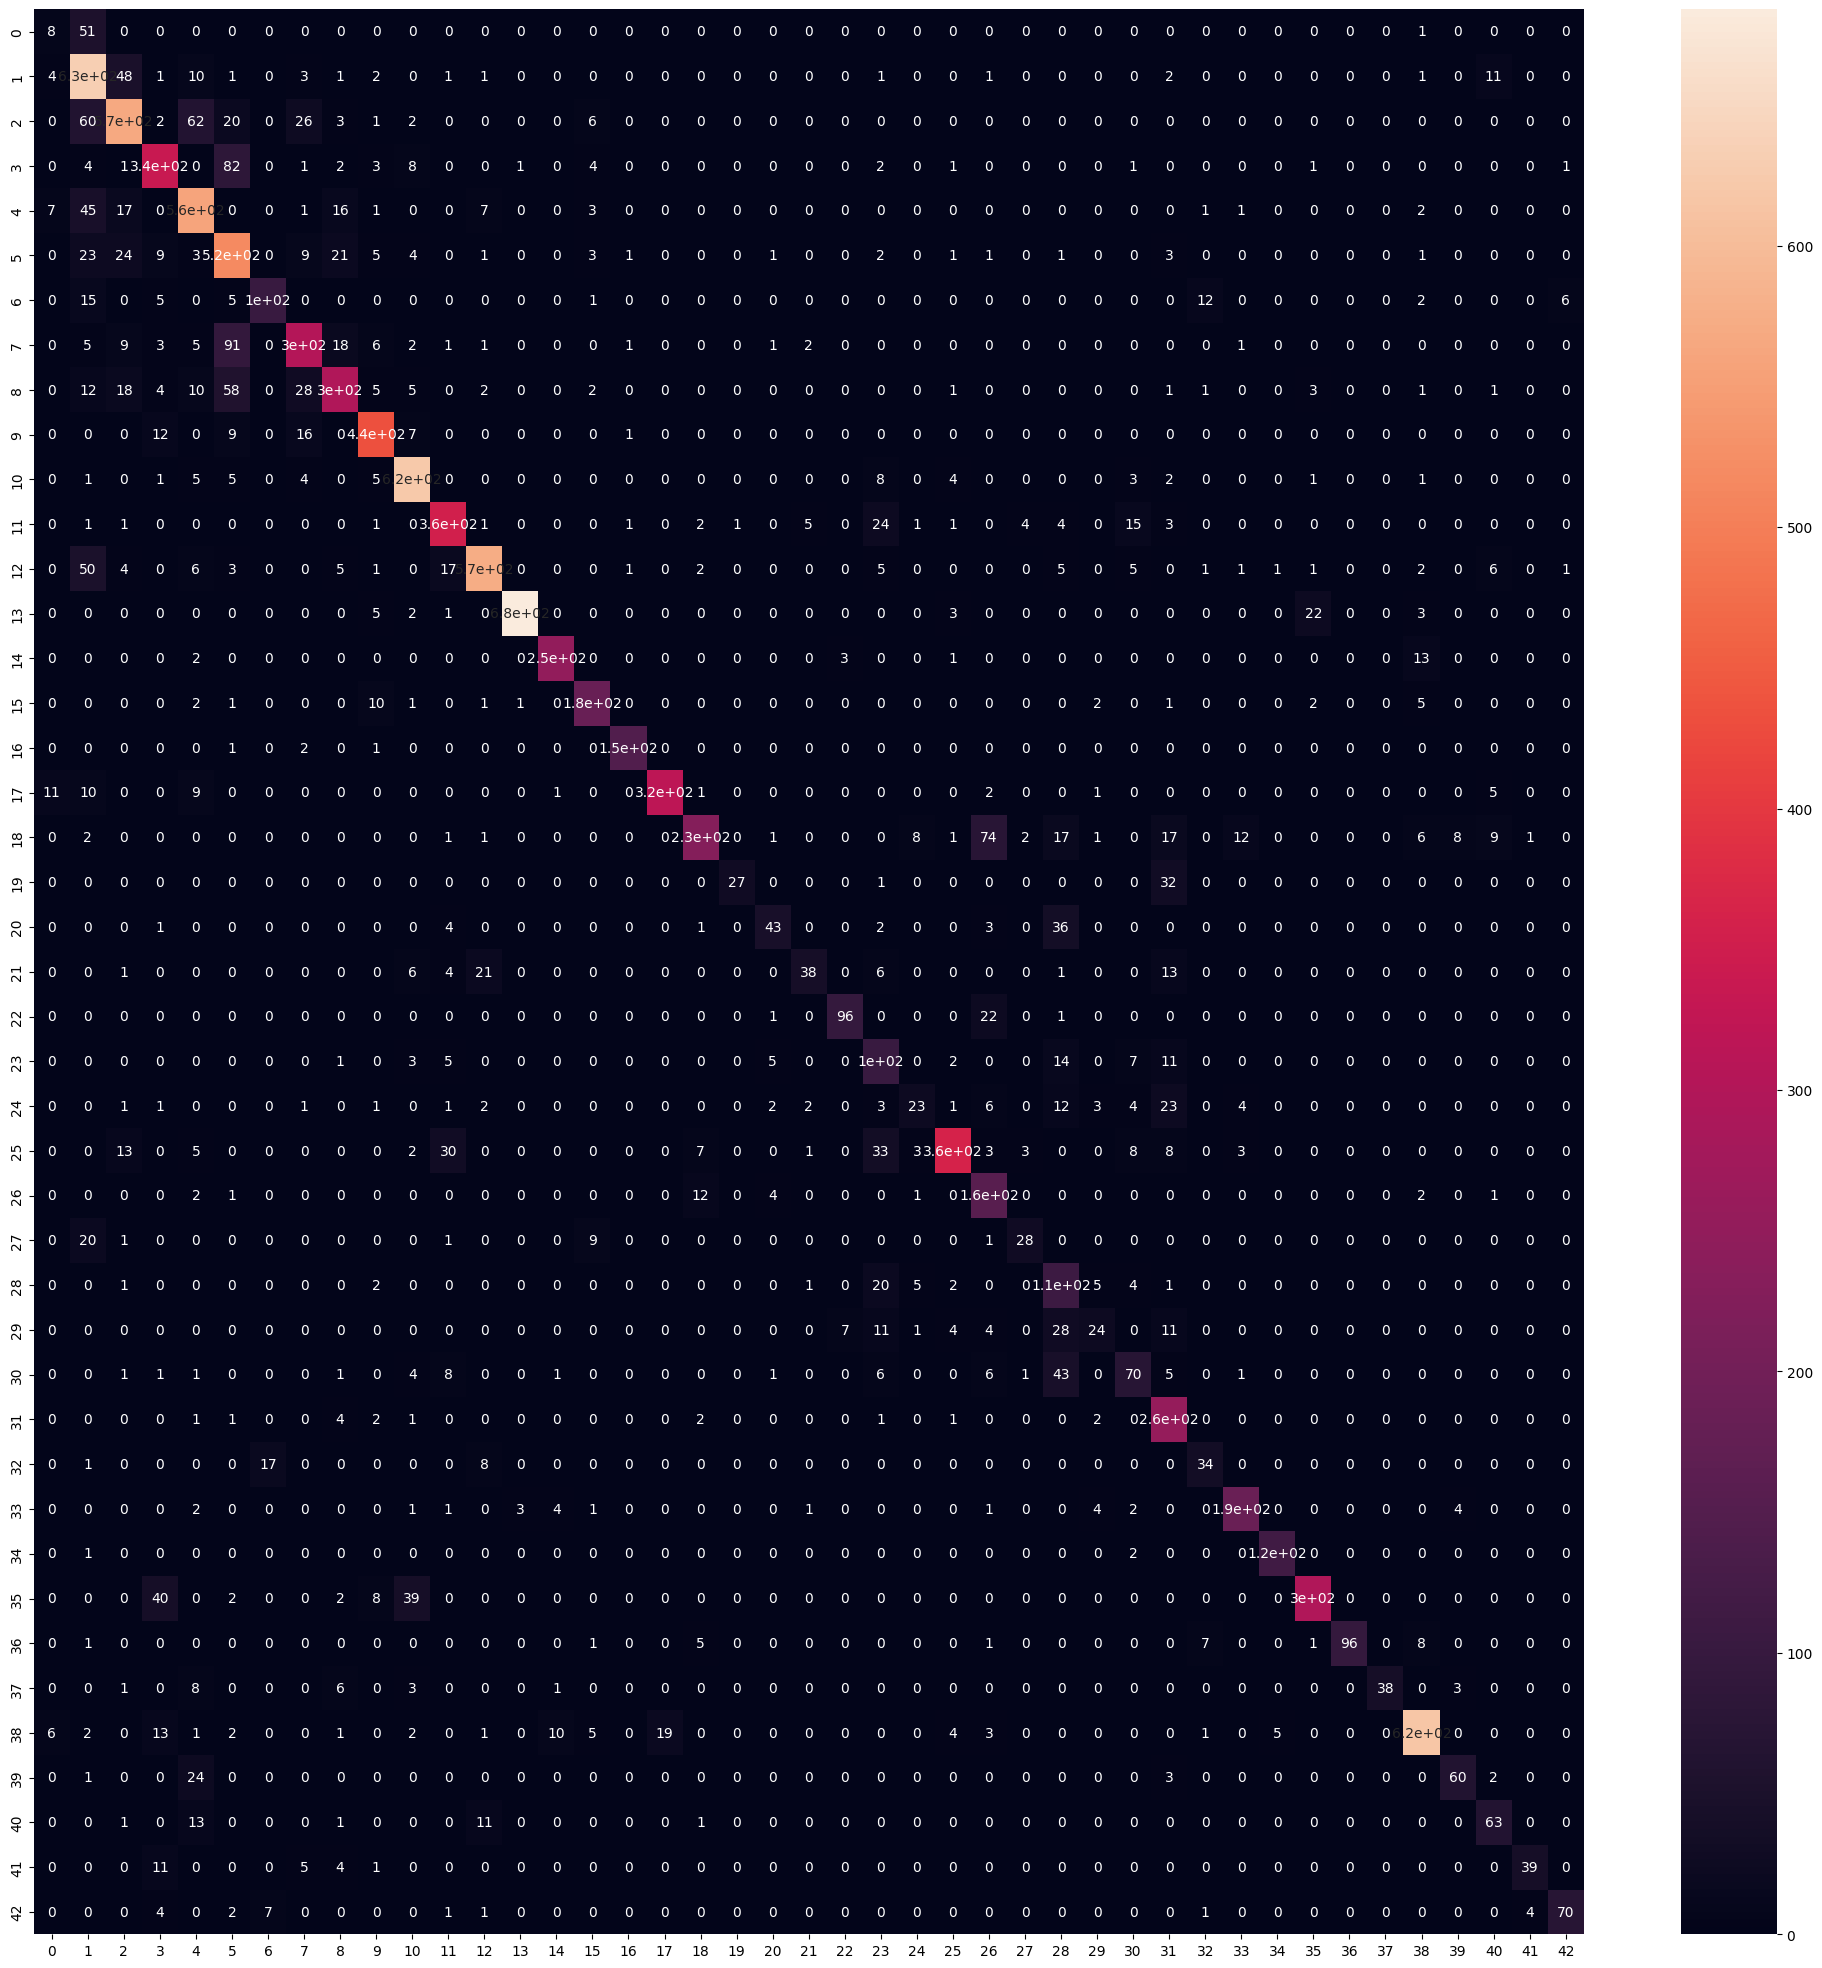

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_probabilities = cnn_model.predict(X_test_gray_norm)

# Tahminleri en yüksek olasılığa yuvarlayarak sınıf etiketlerine dönüştürme
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Gerçek sınıf etiketlerinin ve tahminlerin doğru formatta olduğundan emin olun
y_true = np.array(y_true)  # Gerçek etiketler
predicted_classes = np.array(predicted_classes)  # Tahminler



# Karışıklık matrisini oluşturma
cm = confusion_matrix(y_true, predicted_classes)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(20, 17))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Tahmin Edilen Sınıflar')
plt.ylabel('Gerçek Sınıflar')
plt.show()


cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

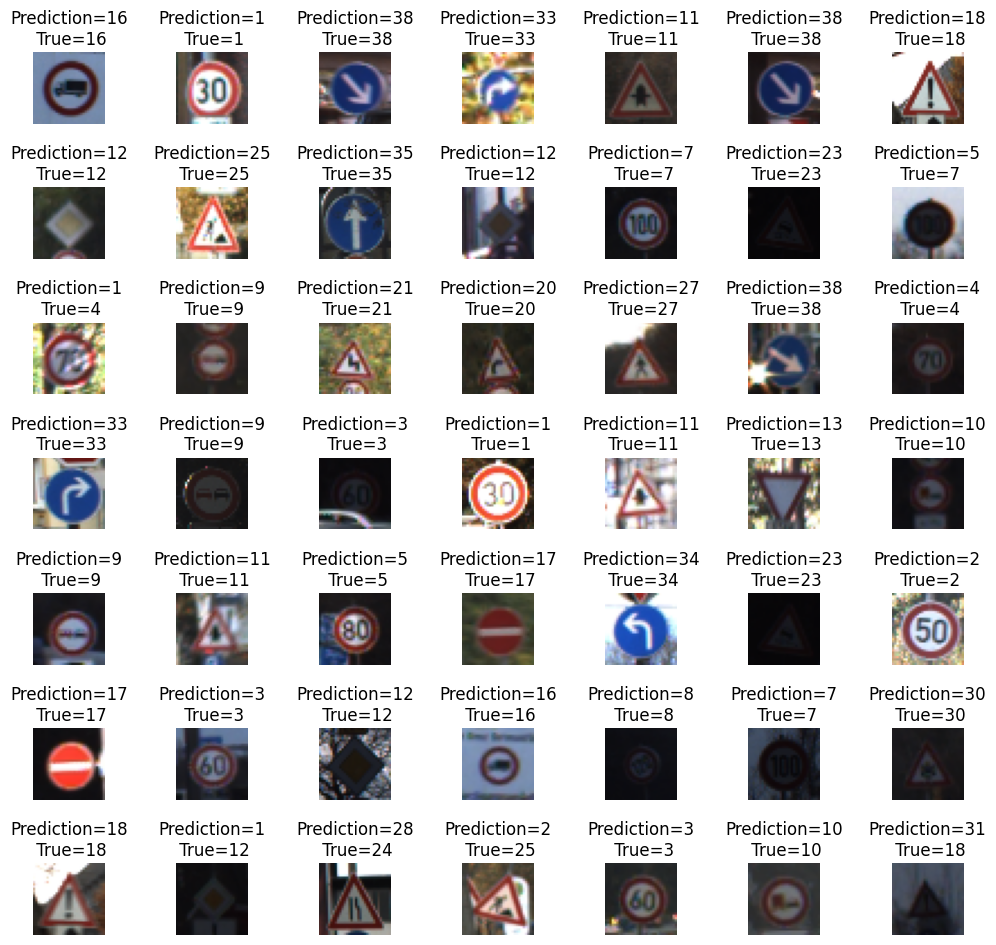

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)